### Implementing simple Chatbot Using LangGraph

In [1]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [4]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

c:\Users\Vanilla\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [5]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="openai/gpt-oss-20b")
llm_groq.invoke("Hey I am Sushant and i like to play football")

AIMessage(content='Hey Sushant! That’s awesome—football’s a great sport. What position do you usually play, or do you just enjoy watching the big leagues? If you’re into training tips, team strategies, or even just chatting about your favorite teams, I’m all ears! ⚽️', additional_kwargs={'reasoning_content': 'The user says: "Hey I am Sushant and i like to play football". The user is just stating. We should respond acknowledging. Possibly ask about football. The user hasn\'t asked a question. We can respond with friendly acknowledgement and ask about their football. The user might want to chat. So respond accordingly.'}, response_metadata={'token_usage': {'completion_tokens': 133, 'prompt_tokens': 83, 'total_tokens': 216, 'completion_time': 0.1323568, 'prompt_time': 0.004542497, 'queue_time': 0.047041703, 'total_time': 0.136899297, 'completion_tokens_details': {'reasoning_tokens': 65}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand

### We Will start With Creating Nodes

In [6]:
from langgraph.checkpoint.memory import MemorySaver # for memory saver 
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

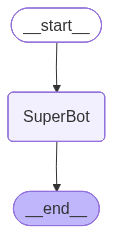

In [7]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile(checkpointer=memory)


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [8]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph_builder.invoke({'messages':"Hi,My name is Sushant And I like football"},config)

{'messages': [HumanMessage(content='Hi,My name is Sushant And I like football', additional_kwargs={}, response_metadata={}, id='651a79a8-c281-4e25-a1ca-760b04a2c649'),
  AIMessage(content='Hello, Sushant! 👋 It’s great to meet you. Football’s a fantastic sport—do you play, follow a particular league, or have a favorite team? I’d love to hear more about what you enjoy!', additional_kwargs={'reasoning_content': 'The user says: "Hi, My name is Sushant And I like football". They are greeting. We should respond in a friendly manner. The user likely wants a chat. We should ask about their football interests or what they like. Provide a friendly response.'}, response_metadata={'token_usage': {'completion_tokens': 111, 'prompt_tokens': 83, 'total_tokens': 194, 'completion_time': 0.130883112, 'prompt_time': 0.009276912, 'queue_time': 0.047270548, 'total_time': 0.140160024, 'completion_tokens_details': {'reasoning_tokens': 55}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93

### Streaming 
Methods: .stream() and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- **values** : This streams the full state of the graph after each node is called.
- **updates** : This streams updates to the state of the graph after each node is called.

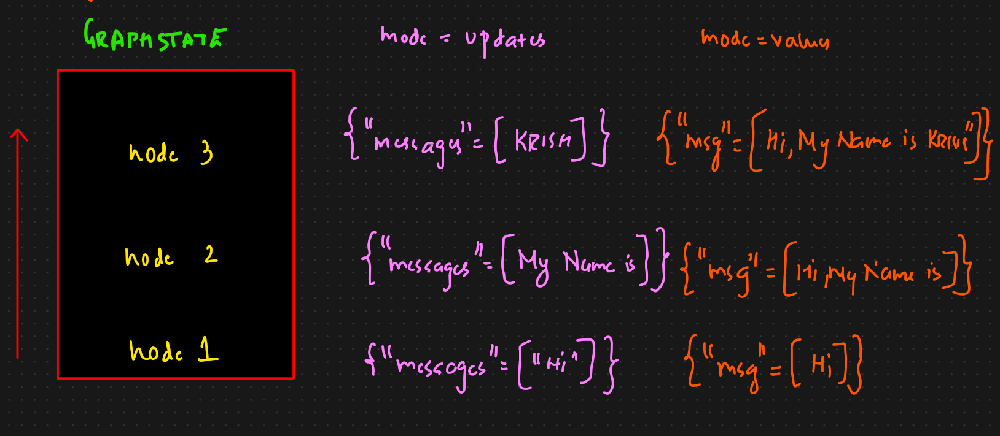

#### Streaming The Responses With Stream Method

In [9]:
# Create a thread
config = {"configurable": {"thread_id": "3"}}

for chunk in graph_builder.stream({'messages':"Hi,My name is Sushant And I like football"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='Hi Sushant! 👋 It’s great to meet a football fan. Which teams or leagues do you follow most? Or maybe you have a favorite player? Let me know—happy to chat about the beautiful game!', additional_kwargs={'reasoning_content': 'User says "Hi,My name is Sushant And I like football". We need to respond politely, maybe ask more about football. There\'s no policy violation. We should greet.'}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 83, 'total_tokens': 175, 'completion_time': 0.093122527, 'prompt_time': 0.014996309, 'queue_time': 0.047046261, 'total_time': 0.108118836, 'completion_tokens_details': {'reasoning_tokens': 38}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--bedefd39-7625-48d3-9a10-e22410a99675-0', usage_metadata={'input_tokens': 83, 'output_tokens': 92, 'total_to

In [10]:
for chunk in graph_builder.stream({'messages':"I also like chess"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Sushant And I like football', additional_kwargs={}, response_metadata={}, id='e8575f00-aeff-43af-9068-536bd670aed3'), AIMessage(content='Hi Sushant! 👋 It’s great to meet a football fan. Which teams or leagues do you follow most? Or maybe you have a favorite player? Let me know—happy to chat about the beautiful game!', additional_kwargs={'reasoning_content': 'User says "Hi,My name is Sushant And I like football". We need to respond politely, maybe ask more about football. There\'s no policy violation. We should greet.'}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 83, 'total_tokens': 175, 'completion_time': 0.093122527, 'prompt_time': 0.014996309, 'queue_time': 0.047046261, 'total_time': 0.108118836, 'completion_tokens_details': {'reasoning_tokens': 38}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'mode

In [11]:
for chunk in graph_builder.stream({'messages':"I also like chess"},config,stream_mode="updates"):
    print(chunk)

{'SuperBot': {'messages': [AIMessage(content='That’s awesome—two worlds that blend strategy, patience, and a dash of creativity! 🎯\n\n**What’s your chess setup?**  \n- Are you into classical 60‑minute games, rapid, or blitz?  \n- Do you play online (Chess.com, Lichess, ICC) or in a local club?  \n- Any favorite openings or end‑games you love to master?\n\n**Football‑chess crossover**  \nSometimes the way you set up a football team—defenders, midfield, attackers—mirrors a chess opening. For example, a solid “castle” (defensive formation) is like a king’s safety in chess, while a “counter‑attack” can feel like a tactical sacrifice in a chess game.\n\n**Got any chess puzzles or positions you’re stuck on?**  \nI can help you work through them or suggest resources to sharpen your play. Let me know what you’d like to dive into!', additional_kwargs={'reasoning_content': 'User says "I also like chess" again. Probably wants to continue conversation. We can ask about chess preferences, maybe sug

In [12]:
for chunk in graph_builder.stream({'messages':"I Love sports "},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi,My name is Sushant And I like football', additional_kwargs={}, response_metadata={}, id='e8575f00-aeff-43af-9068-536bd670aed3'), AIMessage(content='Hi Sushant! 👋 It’s great to meet a football fan. Which teams or leagues do you follow most? Or maybe you have a favorite player? Let me know—happy to chat about the beautiful game!', additional_kwargs={'reasoning_content': 'User says "Hi,My name is Sushant And I like football". We need to respond politely, maybe ask more about football. There\'s no policy violation. We should greet.'}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 83, 'total_tokens': 175, 'completion_time': 0.093122527, 'prompt_time': 0.014996309, 'queue_time': 0.047046261, 'total_time': 0.108118836, 'completion_tokens_details': {'reasoning_tokens': 38}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'mode

#### Streaming The Responses With astream Method

**Streaming tokens**
We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the **tokens** as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Containslanggraph_node, the node emitting the event.

In [13]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages":["Hi My name is Sushant and I like to play futsal"]},config,version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi My name is Sushant and I like to play futsal']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '548a5df4-aef8-44c5-9072-d46c82e76604', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi,My name is Sushant And I like football', additional_kwargs={}, response_metadata={}, id='e8575f00-aeff-43af-9068-536bd670aed3'), AIMessage(content='Hi Sushant! 👋 It’s great to meet a football fan. Which teams or leagues do you follow most? Or maybe you have a favorite player? Let me know—happy to chat about the beautiful game!', additional_kwargs={'reasoning_content': 'User says "Hi,My name is Sushant And I like football". We need to respond politely, maybe ask more about football. There\'s no policy violation. We should greet.'}, response_metadata={'token_usage': {'completion_tokens': 92, 'prompt_tokens': 83, 'total_tokens': 175, 'completion_time': 0.09312252